# Projet numérique : choix du pas de temps

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import*

## Pas fixe

### Méthode d'Euler

In [4]:
def solve_euler_explicit(f, x0, dt, D) : # D*dt est la durée de simulation
    t=[0]*D
    x=[0]*D
    x[0] =  x0
    for j in range (D-1) :
        t[j+1] = t[j]+dt
        x[j+1] = x[j]+dt*f(t[j],x[j])
    return t, x

### Méthode de Heun

Commençons par montrer que c'est un schéma convergent d'ordre 2

Il est démontré dans la corerction des exercices du cours que Heun est un schéma consistant d'ordre 2. il n'est donc pas pertinent de le faire ici. Il suffit donc de montrer que c'est un schéma stable. 

Soit $t_{j}, \Delta t_{j}$ fixés. Il suffit de montrer que la fonction $g : x \rightarrow \frac{1}{2}( f(t_{j},x) + f(t_{j} + \Delta t{j}, x + \Delta t_{j}f(t_{j},x))$ est localement lipschitzienne, c’est-à-dire sur tout compact.

On se donne donc K un compact, borné en dimension finie.

Soit $x,y \in K$. En utilisant f $C^{1}$ et le développement de Taylor calculé précédemment, on obtient
$\Vert g(x)-g(y)\Vert = \Vert  \frac{1}{2}( f(t_{j},x) + f(t_{j} + \Delta t_{j}, x + \Delta t_{j}f(t_{j},x)) - \frac{1}{2}( f(t_{j},y) + f(t_{j} + \Delta t_{j}, y + \Delta t_{j}f(t_{j},y)) \Vert  \\ \leqslant \Vert  f(t_{j},x)- f(t_{j},y) \Vert + \Vert \frac{1}{2}\Delta t_{j}(\partial_{t}f(t_{j},x)- \partial_{t}f(t_{j},y)) \Vert + \Vert \frac{1}{2}\Delta t_{j}(f(t_{j},x)\partial_{x}f(t_{j},x))- f(t_{j},y)\partial_{x}f(t_{j},y)) \Vert $

Notons $h : x \rightarrow f(t_{j},x)\partial_{x}f(t_{j},x)$  $C^{1}$ par produit de fonctions $C^{1}$

Comme f est $C^{2}$, les dérivées partielles d’ordre 1 et 2 selon t et x sont continues sur K donc bornées. Notons $M_{t}$ et $M_{x}$ et $M_{tx}(=M_{xt}$ par théorème de Schwarz) leurs majorants respectifs sur K . Comme h est $C^{1}$, ses dérivées partielles sont bornées sur K. Notons $M’_{t}$ et $M’_{x}$ des majorants des dérivées partielles de h sur K. Alors, 
$\Vert g(x)-g(y)\Vert  \leqslant  ( [M_{t}+M_{x}] + [M_{tx}]  +  [(M’_{x}+ M’_{t}) ] )\Vert  x-y \Vert$.

Rq : Chaque terme entre crochet correspond respectivement  à une majoration de la norme de la différence de « même rang » dans l’expression totale. 

Ainsi, g est bien lipschitzienne sur K, et donc le schéma de Heun est stble et il est donc bien convergent, d’ordre 2, et on peut l'utiliser pour cette question.

In [5]:
def solve_heun(f, x0, dt, D) :
    t=[0]*D
    x=[0]*D
    x[0] =  x0
    for j in range (D-1) :
        t[j+1] = t[j] + dt
        x[j+1] = x[j] + (dt/2)*(f(t[j], x[j]) + f(t[j+1],x[j] + dt*f(t[j], x[j])))
    return t, x

### Exemple 1

Par exemple : $\dot{x} = f(t, x)$ où $f(t, x) = -\frac{x}{10}$ et $x_{0} = 1$

In [6]:
def f(t, x) :
    return -(1/10)*x

Alors $x(t) = e^{-\frac{t}{10}}$

In [7]:
def f1(t, x0) :
    return x0*np.exp(-0.1*t) # solution réelle

Avec $dt = 1$

In [8]:
T, X = solve_euler_explicit(f, 1, 1, 40)
T2, X2 = solve_heun(f, 1, 1, 40)
T1 = np.linspace(0, 39, 40)
X1 = f1(T1, 1) #solution réelle

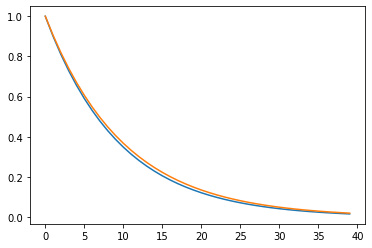

In [9]:
plt.plot(T, X)
plt.plot(T1, X1) #comparaison Euler-solution réelle avec dt = 1

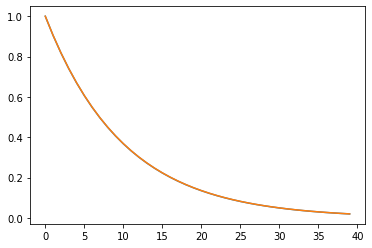

In [10]:
plt.plot(T1, X1)
plt.plot(T2, X2) #comparaison Heun-solution réelle

La méthode de Heun (ordre 2) permet d'obtenir un résultat plus proche de la solution réelle que celui obtenu avec le schéma d'Euler explicite (ordre 1).

Avec $dt = 0,01$

In [29]:
T, X = solve_euler_explicit(f, 1, 0.01, 4000)
T1 = np.linspace(0, 39, 4000)
X1 = f1(T1, 1) #solution réelle

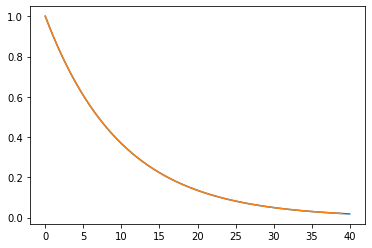

In [30]:
plt.plot(T, X)
plt.plot(T1, X1) #comparaison Euler-solution réelle avec dt=0.01

Si on réduit le pas de temps (ici on a divisé $dt$ par $100$), on améliore considérablement la précision.

### Exemple 2

Avec $\dot{X} = g(t,X)$ où $g(t,X) = AX$ avec $X = \begin{pmatrix} \dot{x} \\ x \end{pmatrix}$ et $A = \begin{pmatrix} 0 & -4 \\ 1 & 0 \end{pmatrix}$  

In [15]:
def g(t,x) :
    A=np.array([[0, -4], [1, 0]])
    return np.dot(A, x)

Alors $x(t) = x_{0}\cos(2t) + \frac{\dot{x}_{0}}{2}\sin(2t)$

In [16]:
def g1(t, x0) :
    return (x0[0]*np.cos(2*t) + (x0[1]/2)*np.sin(2*t)) #solution réelle

Avec $X_{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ et $dt = 0.1$ :

In [32]:
T, X = solve_euler_explicit(g, [1, 0], 0.1, 400)
T2, X2 = solve_heun(g, [1, 0], 0.1, 400)
T1 = np.linspace(0, 39, 400)
X1 = g1(T1, [1, 0]) 
Y = np.transpose(X)[0]
Y2 = np.transpose(X2)[0] #on ne s'intéresse qu'aux positions, pas aux vitesses

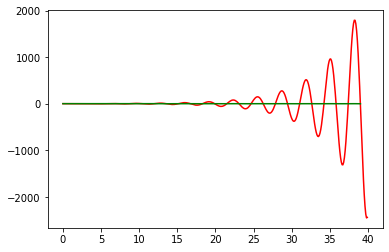

In [33]:
plt.plot(T, Y, color = 'r') # Euler
plt.plot(T1, X1, color = 'g') # solution réelle
# comparaison Euler-solution réelle

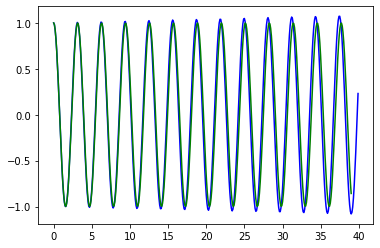

In [34]:
plt.plot(T2, Y2, color = 'b')
plt.plot(T1, X1, color = 'g')
# comparaison Heun-solution réelle

Avec la méthode de Heun, on obtient de nouveau un résultat beaucoup plus proche de la solution réelle qu'avec Euler. Avec Euler, la solution obtenue diverge beaucoup plus rapidement qu'avec la méthode de Heun, qui reste une approximation correcte sur des intervalles de temps pas trop longs(cela dépend du taux de précision souhaité). Cependant, dans les deux cas, au fur et à mesure qu'on avance dans les simulations, les erreurs s'accumulent et l'écart entre solution approchée et solution réelle augmente.

Avec $dt = 0.001$ :

In [35]:
T, X = solve_euler_explicit(g, [1, 0], 0.001, 40000)
T2, X2 = solve_heun(g, [1, 0], 0.001, 40000)
T1 = np.linspace(0, 39, 40000)
X1 = g1(T1, [1, 0]) 
Y = np.transpose(X)[0]
Y2 = np.transpose(X2)[0] #on ne s'intéresse qu'aux positions, pas aux vitesses

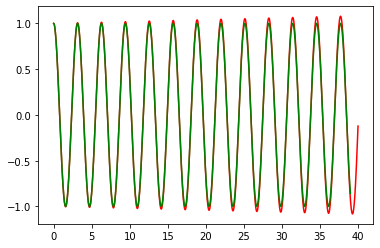

In [36]:
plt.plot(T, Y, color = 'r') # Euler
plt.plot(T1, X1, color = 'g') # solution réelle
# comparaison Euler-solution réelle

On remarque que de nouveau, avec Euler explicite, réduire le pas de temps permet d'améliorer la précision. Il en va de même avec Heun (qui reste plus précis qu'Euler dans cet exemple), comme illustré ci-dessous :

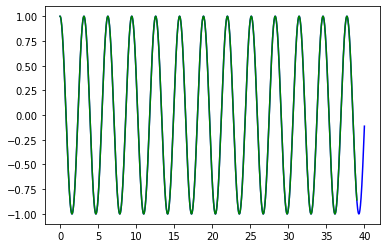

In [37]:
plt.plot(T2, Y2, color = 'b')
plt.plot(T1, X1, color = 'g')
# comparaison Heun-solution réelle

## Euler avec pas de temps variable

Ici, il faut d'abord exprimer l'erreur locale comme le demande l'énoncé.

Attention : il est indiqué dans l’énoncé qu’il faut considérer f $C^{1}$. Cependant, pour obtenir l’expression demandée, avec un $O(\Delta t_{j}^{3})$, il est nécessaire d'avoir f $C^{2}$ (hypothèse confirmée par Pauline Bernard lors d'un échange de mail). C'est donc dans cette hypothèse qu'on se place ici.

Soit $f \in C^{2}(RxR^{n}, R^{n})$, x une solution de $\dot{x}(t)=f(t,x(t))$ 

$e^{j+1}= x^{j} + \int_{t_{j}}^{t_{j+1}} (f(s),x(s))ds  -  x^{j+1} $

Comme f est $C^{1}$, on peut réexprimer f(s,x(s)) en fonction de $f(t_{j},x^{j})$ et des dérivées partielles de f en ce point et faire de même pour $(t_{j+1},x^{j+1})$ et les dérivées partielles de f en ce point. Alors, 
$f(s,x(s))= \frac{1}{2}(f(t_{j},x(t_{j})) + \partial_{t}f(t_{j},x(t_{j}))(s-t_{j}) + \partial_{x}f(t_{j},x(t_{j})))\dot{x}(t_{j})(s-t_{j}) + f(t_{j+1},x(t_{j+1})) + \partial_{t}f(t_{j+1},x(t_{j+1}))(s-t_{j+1}) + \partial_{x}f(t_{j+1},x(t_{j+1})))\dot{x}(t_{j+1})(s-t_{j+1}))$


De plus,  $x^{j+1}=  x^{j} + \Delta t_{j}f(t_{j},x(t_{j}))$

Alors, $e^{j+1}=  \int_{t_{j}}^{t_{j+1}}f(s,x(s))ds - \Delta t_{j}f(t_{j},x(t_{j}))  \\ = \int_{t_{j}}^{t_{j+1}}(\frac{1}{2}(f(t_{j},x(t_{j})) + \partial_{t}f(t_{j},x(t_{j}))(s-t_{j}) + \partial_{x}f(t_{j},x(t_{j})))\dot{x}(t_{j})(s-t_{j}) + f(t_{j+1},x(t_{j+1})) + \partial_{t}f(t_{j+1},x(t_{j+1}))(s-t_{j+1}) + \partial_{x}f(t_{j+1},x(t_{j+1})))\dot{x}(t_{j+1})(s-t_{j+1}) ds - \Delta t_{j}f(t_{j},x(t_{j})) \\=  \Delta t_{j}\frac{ \Vert f(t_{j+1},x(t_{j+1})) – f(t_{j},x(t_{j}))\Vert}{2} +  \Delta t_{j}^{2}(\partial_{t}f(t_{j},x(t_{j})) - \partial_{t}f(t_{j+1},x(t_{j+1})) + \partial_{x}f(t_{j},x(t_{j})))\dot{x}(t_{j}) – \partial_{x}f(t_{j+1},x(t_{j+1})))\dot{x}(t_{j+1}))$

Par hypothèse, f est $C^{2}$, ou les dérivées partielles de f sont lipschitziennes. Ainsi , sur l’intervalle $[0,T]$ d’étude, on peut majorer $\partial_{t}f(t_{j},x(t_{j})) – \partial_{t}f(t_{j+1},x(t_{j+1}))$ par un terme de la forme $K\Delta t_{j}$ et faire de même pour la dérivée partielle de f par rapport à x . Ainsi,le terme dans la parenthèse multiplicative de $\Delta_{j}^{2}$est un grand $O(\Delta t_{j})$.

Finalement, on obtient $e^{j+1}= \Delta t_{j}\frac{ \Vert f(t_{j+1},x(t_{j+1})) – f(t_{j},x(t_{j}))\Vert}{2} + O(\Delta t_{j}^{3})$. 


Pour montrer que l'erreur est un $O(\Delta t_{j}^{2})$, il suffit de montrer que le terme facteur de $\Delta t_{j}$ dans la question précédente est un grand $O(\Delta t_{j})$

Comme on le fait depuis le début, on exprime $f(t_{j+1},x(t_{j+1}))$ en fonction de $f(t_{j},x(t_{j}))$ et de la différentielle de f en ce point. On obtient ainsi le résultat. 

Posons $\Delta t_{new} = \Delta t\sqrt{\frac{Tol_{abs}}{\Vert e^{j+1} \Vert}}$.  Si $Tol_{abs}$ est très grand devant $\sqrt{\Vert e^{j+1}}\Vert$,  $\Delta t_{new}$ est très grand devant $\Delta t_{j}$. Cela signifie également qu’ on ne fait localement que très peu d’erreur, donc que la fonction est régulière à cet endroit et qu’il est possible de l’approximer facilement.  Ainsi, on peut incrémenter l’algorithme avec  le nouvel intervalle de temps d’incrémentation $\Delta t_{j+1}= \Delta t_{new}$. Si l’on se donne une erreur maximale autorisée ($Tol_{abs}$ ici), on doit vérifier que l’erreur obtenue ainsi reste inférieure à $Tol_{abs}$. Si ce n’est pas le cas, c’est que la fonction devient moins régulière dans un voisinage pas trop éloigné du point $(t_{j+1},x^{j+1})$. On peut alors remplacer  $\Delta t_{new}$ par $\Delta t_{new}’= \sqrt{\frac{Tol_{abs}}{K}}$ pour s’assurer que l’erreur locale reste majorée par $Tol_{abs}$. *
Ainsi, on s’assure en permanence que l’erreur  locale soit majorée par Tol_{abs} et on maximise dans les meilleurs des cas le pas d’incrémentation de l’algorithme.

*On pourrait se dire ici que le pas va rester constant si l’on obtient une erreur qui est toujours de l’ordre de $Tol_{abs}$. Cependant, $Tol_{abs}$ étant petit, cela signifierait que la fonction étudiée n’est jamais très régulière, car on n’approche pas l’erreur locale de 0. Alors, il est de toute façon nécessaire de garder un pas assez petit afin de l’approximer correctement, et cette méthode permet de donner la valeur du pas correspondant. Dans les meilleurs des cas, la fonction étudiée ne sera irrégulière que localement, et on pourra maximiser fréquemment le pas de temps d’incrémentation comme vu précédemment.

NB : ici la valeur de K n’est pas connue à priori. Dans ce cas, on ne fixe pas K mais on peut utiliser $K_{j}$ définit par $K_{j}=\frac{e^{j}}{\Delta t{j}^{2}}$. Si $K_{j}$ devient grand, cela signifie que l’erreur aussi devient grande en comparaison du carré de l’intervalle de temps d’incrémentation. Il faut donc faire diminuer la valeur de cet intervalle de temps, et ainsi la valeur $\Delta t_{new}’= \sqrt{\frac{Tol_{abs}}{K_{j}}}$ reste cohérente.


In [35]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # pas de temps initial
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # temps interne : temps écoulé depuis la dernière valeur échantillonnée, utilisé pour le calcul de la prochaine valeur échantillonnée
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t, x)
            x_back = x_next - dt * f(t_next, x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # écart de temps entre ti et dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t, x)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs)

Le pas d'échantillonnage reste constant : c'est $dtmax$. Tous les $dtmax$, on stocke dans $xs$ la valeur $x(t + dtmax)$, déterminée progressivement à partir de $x(t)$. On ne calcule pas directement $x(t+ dtmax)$ : on le calcule par approximations successives.
Pour cela, on découpe l'intervalle $[t, t + dtmax]$ en "tranches" de tailles variables, de longuer $dt$ calculée à chaque itération (de la deuxième boucle while) en fonction de l'erreur commise : $dt = 0,9dt\frac{Tol_{abs}}{\|\frac{x_{back} - x}{2}\|}$ (d'après la formule démontrée précédemment). On adapte ainsi $dt$ à chaque itération pour avoir une erreur acceptable. On calcule à chaque fois (sans la stocker dans $xs$) $x(t + ti + dt)$ en fonction de $x(t + ti)$, où $ti$ est le temps écoulé depuis le dernier stockage d'une valeur $x$ dans le tableau $xs$. On continue jusqu'à ce que $ti$ atteigne ou dépasse le pas de temps d'échantillonnage $dtmax$. On peut alors calculer $x(t + dtmax) = x(t + ti + dt2DT)$, grâce à $x(t+ti)$ calculée à l'itération précédente. $dt2DT$ est l'écart entre $ti$ et $dtmax$. Cette valeur $x(t + dtmax)$ est alors stockée dans $xs$, on réinitialise $ti$ à $0$ et on réitère le processus jusqu'à ce que $t = tf$.

### Exemple 1

On reprend le premier exemple : $\dot{x} = f(t, x)$ où $f(t, x) = -\frac{x}{10}$ et $x_{0} = 1$

In [36]:
def f(t, x) :
    return -(1/10)*x

Alors $x(t) = e^{-\frac{t}{10}}$

In [37]:
def f1(t, x0) :
    return x0*np.exp(-0.1*t)

In [93]:
T, X = solve_euler_explicit(f, 1, 0.01, 4000) #Euler avec pas de temps fixe, qu'on choisit égal à dtmax
T3, X3 = solve_ivp_euler_explicit_variable_step(f, 0, 1, 40) # Euler avec pas de temps variable
T1 = np.linspace(0, 39, 40)
X1 = f1(T1, 1) #solution réelle

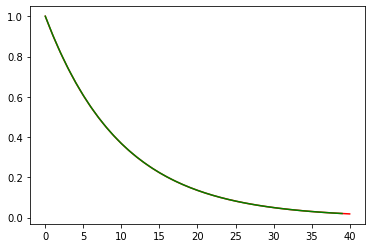

In [94]:
plt.plot(T3, X3, color = 'r')
plt.plot(T1, X1, color = 'g') #comparaison Euler avec pas de temps variable-solution réelle

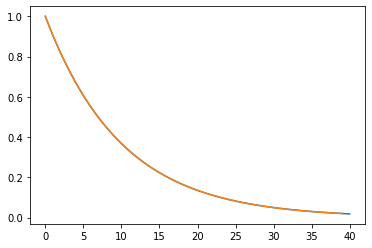

In [95]:
plt.plot(T, X)
plt.plot(T1, X1) #comparaison Euler-solution réelle

Cet exemple ne permet pas de conclure.

### Exemple 2

On reprend le deuxième exemple étudié plus haut : Avec $\dot{X} = g(t,X)$ où $g(t,X) = AX$ avec $X = \begin{pmatrix} \dot{x} \\ x \end{pmatrix}$ et $A = \begin{pmatrix} 0 & -4 \\ 1 & 0 \end{pmatrix}$  

In [96]:
def g(t,x) :
    A=np.array([[0, -4], [1, 0]])
    return np.dot(A, x)

Alors $x(t) = x_{0}\cos(2t) + \frac{\dot{x}_{0}}{2}\sin(2t)$

In [97]:
def g1(t, x0) :
    return (x0[0]*np.cos(2*t) + (x0[1]/2)*np.sin(2*t)) #solution réelle

Avec $X_{0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

In [106]:
T3, X3 = solve_ivp_euler_explicit_variable_step(g, 0, [1, 0], 40) # Euler avec pas de temps variable
T, X = solve_euler_explicit(g, [1, 0], 0.01, 4000) # Euler avec pas de temps fixe, qu'on choisit égal à dtmax
T2, X2 = solve_heun(g, [1, 0], 0.01, 4000) # Heun
T1 = np.linspace(0, 39, 400)
X1 = g1(T1, [1, 0])  # solution réelle
Y = np.transpose(X)[0]
Y2 = np.transpose(X2)[0]
Y3 = np.transpose(X3)[0] # on ne s'intéresse qu'aux positions, pas aux vitesses

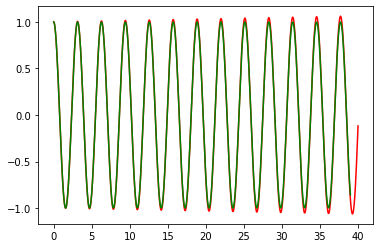

In [103]:
plt.plot(T3, Y3, color = 'r') # Euler avec pas de temps variable
plt.plot(T1, X1, color = 'g') # solution réelle
# comparaison Euler avec pas de temps variable-solution réelle

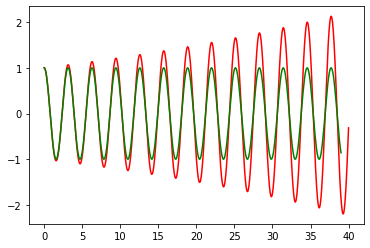

In [104]:
plt.plot(T, Y, color = 'r') # Euler avec pas de temps fixe
plt.plot(T1, X1, color = 'g') # solution réelle
# comparaison Euler-solution réelle

Avec un pas de temps variable, on améliore cette fois-ci nettement la précision de l'algorithme

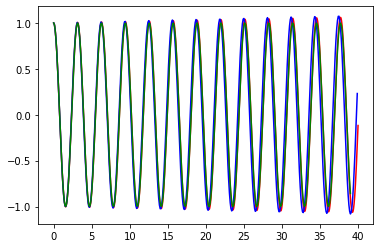

In [78]:
plt.plot(T3, Y3, color = 'r') # Euler avec pas de temps variable
plt.plot(T2, Y2, color = 'b') # Heun
plt.plot(T1, X1, color = 'g') # solution réelle
# comparaison Euler-solution réelle

On va simuler sur une durée plus longue pour comparer l'algorithme d'Euler avc un pas de temps variable avec celui de Heun (pas de temps fixe).

In [111]:
T3, X3 = solve_ivp_euler_explicit_variable_step(g, 0, [1, 0], 80) # Euler avec pas de temps variable
T2, X2 = solve_heun(g, [1, 0], 0.01, 8000) # Heun
T1 = np.linspace(0, 79, 800)
X1 = g1(T1, [1, 0])  # solution réelle
Y2 = np.transpose(X2)[0]
Y3 = np.transpose(X3)[0] # on ne s'intéresse qu'aux positions, pas aux vitesses

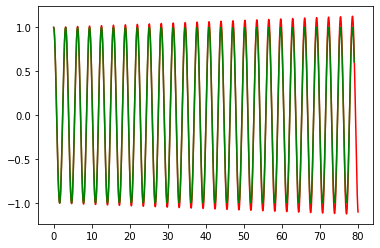

In [112]:
plt.plot(T3, Y3, color = 'r') # Euler avec pas de temps variable
plt.plot(T1, X1, color = 'g') # solution réelle
# comparaison Euler avec pas de temps variable-solution réelle

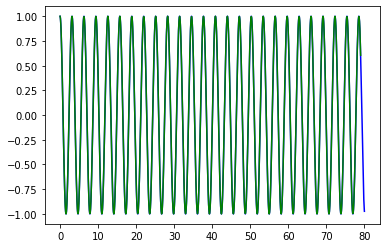

In [113]:
plt.plot(T2, Y2, color = 'b') # Heun
plt.plot(T1, X1, color = 'g') # solution réelle
# comparaison Euler avec pas de temps variable-solution réelle

Dans cet exemple, l'algorithme de Heun semble à nouveau plus performant que celui d'Euler, même si le premier utilise un pas de temps fixe, tandis que le second utilise un pas de temps variable.